In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr 

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
stocks = ['BAC','JPM']
stocks_df = pdr.get_data_yahoo(stocks,start='2014-01-01') 

In [3]:
stocks_df = stocks_df.resample('BM').last()['Close']
 

In [4]:
stocks_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2013-12-31 to 2019-07-31
Freq: BM
Data columns (total 2 columns):
BAC    68 non-null float64
JPM    68 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
stocks_change =pd.DataFrame()

for column in stocks_df:
    if column not in stocks_change:
        stocks_change[column] = np.log(stocks_df[column]).diff()

stocks_change.tail()

,BAC,JPM
Date,,
2019-03-29,-0.052597,-0.030451
2019-04-30,0.102893,0.136626
2019-05-31,-0.139435,-0.090960
2019-06-28,0.086385,0.053650
2019-07-31,0.015398,0.030826


In [6]:
stocks_change = stocks_change[1:]

In [7]:
from sklearn.linear_model import LinearRegression  
model  = LinearRegression(fit_intercept =True)
x= np.array(stocks_change['BAC'])
y = np.array(stocks_change['JPM'])
model.fit(x[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 0, 'BAC')

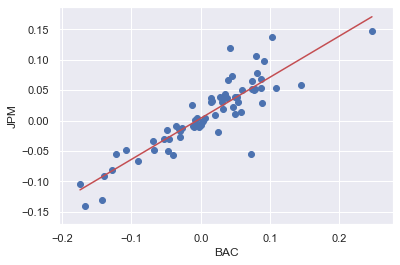

In [8]:
xfit = np.linspace(x.min(),x.max(),100)
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit,c='r')
plt.ylabel('JPM')
plt.xlabel('BAC')

In [9]:
model.coef_

array([0.67547427])

In [10]:
cov = np.cov(stocks_change['JPM'],stocks_change['BAC'],ddof=1)
cov

array([[0.0033223 , 0.0038646 ],
       [0.0038646 , 0.00572131]])

In [11]:
beta = cov[0,1] /cov[1,1]

In [12]:
beta

0.6754742677860662

In [18]:
stocks_df = pdr.get_data_yahoo(stocks,start='2014-01-01') 
stocks_df.head()

Attributes       High                   Low                  Open             \
Symbols           BAC        JPM        BAC        JPM        BAC        JPM   
Date                                                                           
2013-12-31  15.620000  58.549999  15.510000  58.049999  15.600000  58.200001   
2014-01-02  16.160000  58.500000  15.680000  57.970001  15.690000  58.310001   
2014-01-03  16.500000  58.950001  16.230000  58.209999  16.270000  58.290001   
2014-01-06  16.730000  59.470001  16.559999  58.830002  16.629999  59.160000   
2014-01-07  16.790001  59.430000  16.450001  58.110001  16.770000  59.290001   

Attributes  Close                  Volume              Adj Close             
Symbols       BAC        JPM          BAC         JPM        BAC        JPM  
Date                                                                         
2013-12-31  15.57  58.480000   57188900.0  11017400.0  14.383145  50.032772  
2014-01-02  16.10  58.209999  148709900.0  15627600.0  14.872746  50.127510  
2014-01-03  16.41  58.660000  129921800.0  14214100.0  15.159114  50.515026  
2014-01-06  16.66  59.000000  114431300.0  17550700.0  15.390057  50.807812  
2014-01-07  16.50  58.320000  110605100.0  17851200.0  15.242256  50.222229

In [19]:
stocks_df =stocks_df['Close']

In [20]:
stocks_df.head()

Symbols,BAC,JPM
Date,,
2013-12-31,15.57,58.480000
2014-01-02,16.10,58.209999
2014-01-03,16.41,58.660000
2014-01-06,16.66,59.000000
2014-01-07,16.50,58.320000


In [21]:
vol = pd.DataFrame()

In [22]:
for stock in stocks_df:
    if stock not in vol :
        vol[stock] = np.log(stocks_df[stock]).diff()

In [23]:
vol.head()

,BAC,JPM
Date,,
2013-12-31,NaN,NaN
2014-01-02,0.033473,-0.004628
2014-01-03,0.019072,0.007701
2014-01-06,0.015120,0.005779
2014-01-07,-0.009650,-0.011592


In [24]:
var_BAC = vol['BAC'].var() * 252
var_JPM= vol['JPM'].var() *252
print(var_BAC)
print(var_JPM)

0.06389073810554181
0.04253388865460298


In [25]:
w_BAC =  .9
w_JPM = 1 - w_BAC
exp_BAC = .14
exp_JPM = .07

In [26]:
exp = w_BAC * exp_BAC + w_JPM * exp_JPM

In [27]:
exp

0.13300000000000003

In [28]:
cov = np.cov(vol['JPM'][1:], vol['BAC'][1:])[0,1] *252
cov

0.04513597657759011

In [29]:
port_std = np.sqrt(var_BAC * w_BAC **2 + var_JPM * w_JPM ** 2 + 2 * cov * w_BAC * w_JPM)
port_std

0.2455632556715298

In [30]:
effic = pd.DataFrame({'weight_JPM':np.zeros(21), 'exp_ret': np.zeros(21), 'std': np.zeros(21)})
w_aapl = 0.0
for weight in range(21):
    effic['weight_JPM'][weight] = w_JPM
    effic['exp_ret'][weight] = w_JPM * exp_JPM + (1-w_JPM) * exp_BAC
    effic['std'][weight] = np.sqrt(var_JPM * w_JPM ** 2 + var_BAC * (1-w_JPM) ** 2 + cov * w_JPM * (1 - w_JPM))
    w_JPM = w_JPM + .05

effic

,weight_JPM,exp_ret,std
0,0.10,0.1330,0.237148
1,0.15,0.1295,0.229941
2,0.20,0.1260,0.223189
3,0.25,0.1225,0.216933
4,0.30,0.1190,0.211218
5,0.35,0.1155,0.206089
6,0.40,0.1120,0.201590
7,0.45,0.1085,0.197766
8,0.50,0.1050,0.194654
9,0.55,0.1015,0.192290


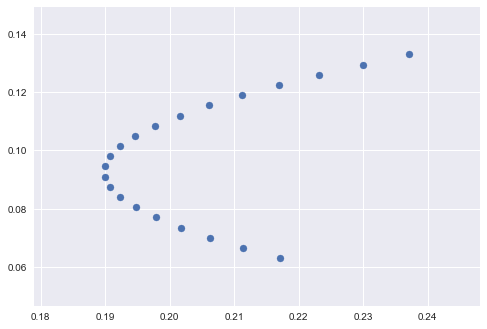

In [31]:
with plt.style.context('seaborn'):
    plt.scatter(effic['std'],effic['exp_ret'])